In [1]:
# Alex Rios 801320278
# Assignment1 Summer 2025

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# go ahead load and find the path for my dataset 
df = pd.read_csv('../Datasets/HW1.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M
print(f"Loaded {M} samples.") # rather than a random "100" I will add addtional info on what 100 means. 
print(df.head()) # from the df.head() I went ahead and added print to make it show our first 4 rows 


Loaded 100 samples.
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [2]:
df.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


For X1:
h(x) = 4.1850 + -1.3600x

For X2:
h(x) = 0.6015 + 0.6100x

For X3:
h(x) = 2.0909 + -0.2118x



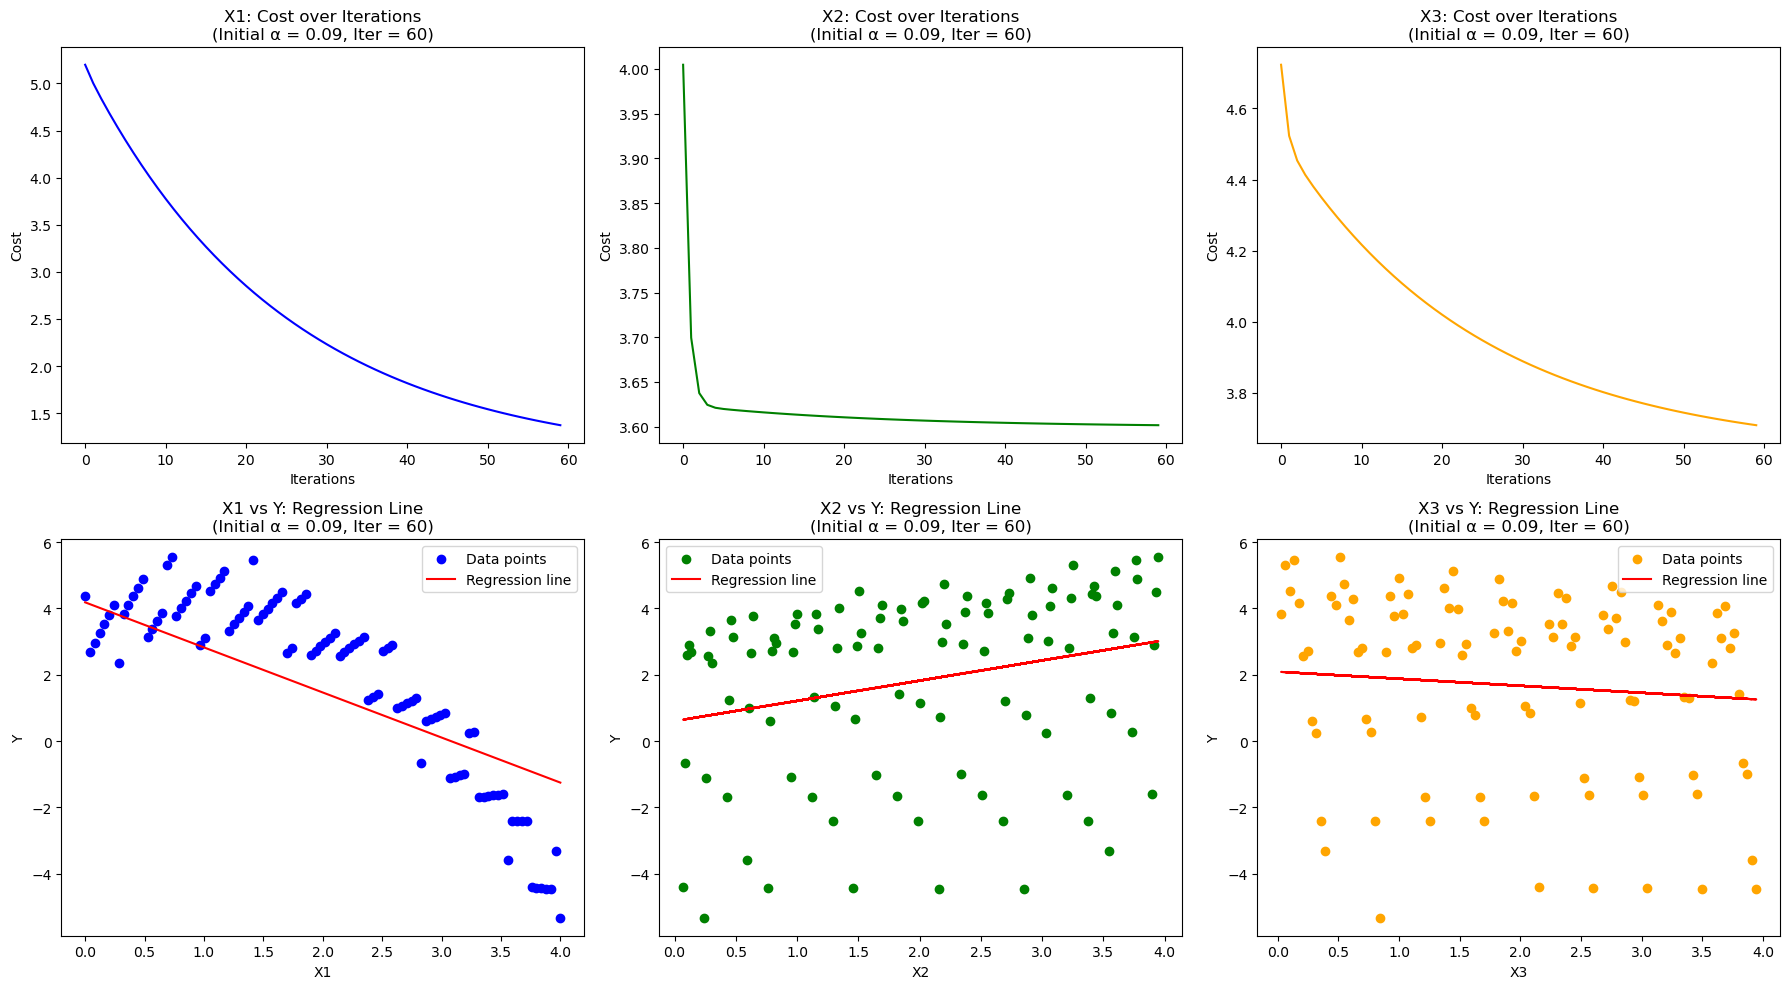

In [5]:
# Define learning rate and iterations 
# We can adjust the values between 0.1 and 0.01 — starting with 0.05 and 40 iterations
Iterations = 60  # our final iterations
Alpha = 0.09     # our final alpha

# Gradient Descent Function 
def GradientDescent(X, Y, Theta, Alpha, Iterations):  
    M = len(X)  # number of training examples
    CostHistory = []  # Track cost at each iteration

    for i in range(Iterations):
        Predictions = X @ Theta
        Errors = Predictions - Y
        Gradient = (Alpha / M) * (X.T @ Errors)
        Theta = Theta - Gradient
        CostHistory.append(ComputeCost(X, Y, Theta))

    return Theta, CostHistory

# Cost Function 
def ComputeCost(X, Y, Theta): 
    M = len(Y)
    Predictions = X @ Theta
    Errors = Predictions - Y
    SquaredErrors = Errors ** 2
    return (1 / (2 * M)) * np.sum(SquaredErrors)

# Features and Target Variable 
Features = {}  # Processed X1, X2, X3
Thetas = {}    # Initial theta vectors
Costs = {}     # Cost history

# Extract and reshape Y
Y = df["Y"].values.reshape(-1, 1) 

# Loop through features
for Col in ["X1", "X2", "X3"]:
    X = df[Col].values.reshape(-1, 1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    Features[Col] = X
    Thetas[Col] = np.zeros((X.shape[1], 1))

    Thetas[Col], Costs[Col] = GradientDescent(X, Y, Thetas[Col], Alpha, Iterations)

# Print Final Parameters for Each Feature
for Col in ["X1", "X2", "X3"]:
    Theta0 = Thetas[Col][0][0]
    Theta1 = Thetas[Col][1][0]
    print(f"For {Col}:")
    print(f"h(x) = {Theta0:.4f} + {Theta1:.4f}x\n")

# for our Plot. Cost Histories on Top, Regression Lines on Bottom
plt.figure(figsize=(18, 10))

Colors = {"X1": "blue", "X2": "green", "X3": "orange"}

for Idx, Col in enumerate(["X1", "X2", "X3"], start=1):
    Xvals = Features[Col]      # original: X1*, X2*, X3*
    ThetaParams = Thetas[Col]  # original: theta_x1*, etc.
    CostLog = Costs[Col]       # original: cost_history_x1*, etc.
    Color = Colors[Col]

    #  Cost Over Iterations 
    plt.subplot(2, 3, Idx)
    plt.plot(range(Iterations), CostLog, color=Color)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title(f"{Col}: Cost over Iterations\n(Initial α = {Alpha}, Iter = {Iterations})")

    #  Regression Line 
    plt.subplot(2, 3, Idx + 3)
    plt.scatter(Xvals[:, 1], Y, color=Color, label="Data points")
    plt.plot(Xvals[:, 1], Xvals @ ThetaParams, color="red", label="Regression line")
    plt.xlabel(Col)
    plt.ylabel("Y")
    plt.title(f"{Col} vs Y: Regression Line\n(Initial α = {Alpha}, Iter = {Iterations})")
    plt.legend()

plt.tight_layout()
plt.show()
